# Testing Uber CoordConv layer Regression

In [5]:
from keras import layers, Model, Input
from keras.callbacks import EarlyStopping
from autoencoders.coord_conv import CoordinateChannel2D
from experiment_datasets.single_point import generate_single_point_coords

In [6]:
import tensorflow as tf

devices = tf.config.list_physical_devices('GPU')

if len(devices) < 1:
    raise Exception("Cannot initialize GPU")

print("GPU configured correctly")

GPU configured correctly


In [7]:
images_train, coords_train, images_test, coords_test = generate_single_point_coords(32, 32, validation_split=0.15)
DATASET_SIZE = coords_train.shape[0]
VALIDATION_SIZE = coords_test.shape[0]
INPUT_SHAPE = coords_train.shape[1:]
OUTPUT_SHAPE = images_train.shape[1:]

In [21]:
ip = Input(shape=INPUT_SHAPE)
x = ip

x = layers.Reshape((1, 1, 2))(x)
x = layers.Lambda(lambda x: tf.tile(x, tf.constant([1, OUTPUT_SHAPE[0], OUTPUT_SHAPE[1], 1])))(x)

x = CoordinateChannel2D()(x)
x = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(x)
x = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(x)
x = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(x)
x = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(x)
x = layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(x)

model_coord = Model(ip, x)
model_coord.compile(optimizer='adam', loss='binary_crossentropy')
model_coord.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 1, 1, 2)           0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 32, 32, 2)         0         
_________________________________________________________________
coordinate_channel2d_2 (Coor (None, 32, 32, 4)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        160       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        1056      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 64)        2112

In [9]:
ip = Input(shape=INPUT_SHAPE)
x = ip

x = layers.Reshape((1, 1, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

model_s = Model(ip, x)
model_s.compile(optimizer='adam', loss='binary_crossentropy')
model_s.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 1, 1, 2)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 1, 64)          1216      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 2, 2, 64)          36928     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 32)          1846

In [10]:
history_coord = model_coord.fit(
    coords_train, images_train,
    epochs=200,
    batch_size=32,
    validation_data=(coords_test, images_test)
)

===========================] - 0s 8ms/step - loss: 0.0122 - val_loss: 0.0132
Epoch 7/200
28/28 [==============================] - 0s 9ms/step - loss: 0.0115 - val_loss: 0.0104
Epoch 8/200
28/28 [==============================] - 0s 8ms/step - loss: 0.0097 - val_loss: 0.0088
Epoch 9/200
28/28 [==============================] - 0s 8ms/step - loss: 0.0084 - val_loss: 0.0078
Epoch 10/200
28/28 [==============================] - 0s 8ms/step - loss: 0.0076 - val_loss: 0.0071
Epoch 11/200
28/28 [==============================] - 0s 8ms/step - loss: 0.0069 - val_loss: 0.0065
Epoch 12/200
28/28 [==============================] - 0s 8ms/step - loss: 0.0065 - val_loss: 0.0062
Epoch 13/200
28/28 [==============================] - 0s 8ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 14/200
28/28 [==============================] - 0s 8ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 15/200
28/28 [==============================] - 0s 8ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 16/200
28/28 [======

In [11]:
history_s = model_s.fit(
    coords_train, images_train,
    epochs=200,
    batch_size=32,
    validation_data=(coords_test, images_test)
)

- 0s 6ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 9/200
28/28 [==============================] - 0s 6ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 10/200
28/28 [==============================] - 0s 6ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 11/200
28/28 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 12/200
28/28 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 13/200
28/28 [==============================] - 0s 6ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 14/200
28/28 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 15/200
28/28 [==============================] - 0s 6ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 16/200
28/28 [==============================] - 0s 6ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 17/200
28/28 [==============================] - 0s 6ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 18/200
28/28 [==============================] -

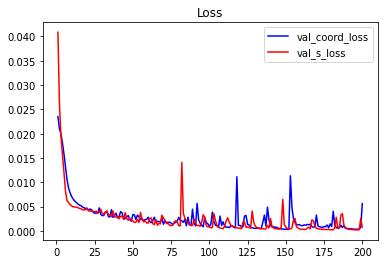

In [22]:
import matplotlib.pyplot as plt

val_loss_coord = history_coord.history['val_loss']
val_loss_s= history_s.history['val_loss']

epochs = range(1, len(val_loss_coord) + 1)

plt.plot(epochs, val_loss_coord, 'b', label='val_coord_loss')
plt.plot(epochs, val_loss_s, 'r', label='val_s_loss')
plt.title("Loss")
axes = plt.gca()
#axes.set_ylim([0, 0.01])
plt.legend()

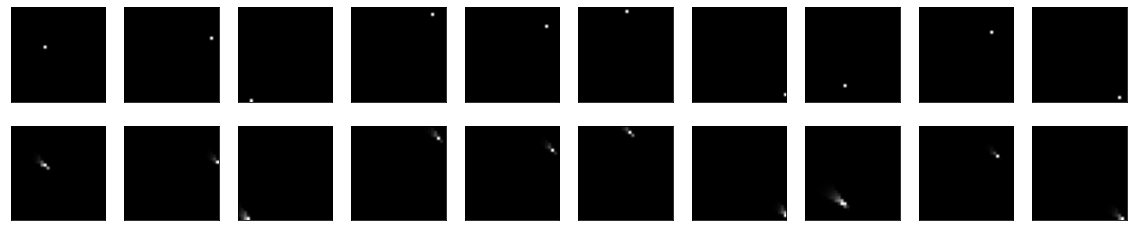

In [20]:
import random
import numpy as np
from experiment_datasets.single_point import generate_matrix_from_coords

n = 10
coords = np.empty((n, *INPUT_SHAPE))

for i in range(n):
    rand_img = random.randint(0, VALIDATION_SIZE-1)
    coords[i] = coords_test[rand_img]

decoded_imgs = model_coord.predict(coords)

images = []
for c in coords:
    images.append(generate_matrix_from_coords(OUTPUT_SHAPE[0], OUTPUT_SHAPE[1], c).numpy())

plt.figure(figsize=(20, 4))

for i in range(1, n+1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(images[i-1].reshape(OUTPUT_SHAPE[0], OUTPUT_SHAPE[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i-1].reshape(OUTPUT_SHAPE[0], OUTPUT_SHAPE[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()